In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.get_option('display.max_columns', None)


20

In [2]:
df_sales=pd.read_csv('nyc-sales.csv')
pd.set_option("display.max_columns", None)
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# First, let's changes the values of BOROUGHS to their names based on Kaggle instruction.
df_sales['BOROUGH'][df_sales['BOROUGH']==1]='Manhattan'
df_sales['BOROUGH'][df_sales['BOROUGH']==2]='Bronx'
df_sales['BOROUGH'][df_sales['BOROUGH']==3]='Brooklyn'
df_sales['BOROUGH'][df_sales['BOROUGH']==4]='Queens'
df_sales['BOROUGH'][df_sales['BOROUGH']==5]='Staten Island'

<ipython-input-3-45b37683807e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['BOROUGH'][df_sales['BOROUGH']==1]='Manhattan'


In [4]:
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# Dropping EASE-MENT AND Unnamed: 0
df_sales=df_sales.drop(['EASE-MENT', 'Unnamed: 0'], axis=1)

In [6]:
# Let's find out which columns are numeric or categorical

print('Columns')
for col in df_sales.columns:
    if df_sales[col].dtype=='object':
        print(col, df_sales[col].nunique())

Columns
BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


Numeric Columns: 

- Land Square Feet, 
- Gross Square Feet, 
- Sale Price, 
- Borough

Categorical columns: 

- Neighborhood, 
- Building Class Category, 
- Tax Class at Present, 
- Building Class at Present, 
- Building Class at Time of Sale, 
 -Tax Class at Time of Sale

In [7]:
num=['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'SALE PRICE']
for col in num: # it allows us to find the missing values
    df_sales[col]=pd.to_numeric(df_sales[col], errors='coerce')
    
cat=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in cat:
    df_sales[col]=df_sales[col].astype('category')

df_sales['SALE DATE']=pd.to_datetime(df_sales['SALE DATE'], errors='coerce')

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [9]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [10]:
df_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [11]:
# Let's find out the percentage of missing values in these three columns
missing_values=df_sales.isnull().sum()/len(df_sales)*100
print(pd.DataFrame([missing_values[missing_values>0], pd.Series(df_sales.isnull().sum()[df_sales.isnull().sum()>1000])], index=['Missing Percentage', 'How Many is Missing']))

                     LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
Missing Percentage          31.049818          32.658372     17.22217
How Many is Missing      26252.000000       27612.000000  14561.00000


It looks like LAND SQUARE FEET has 31% missing, and GROSS SQUARE FEET 32%, while it is 17% in SALE PRICE. 

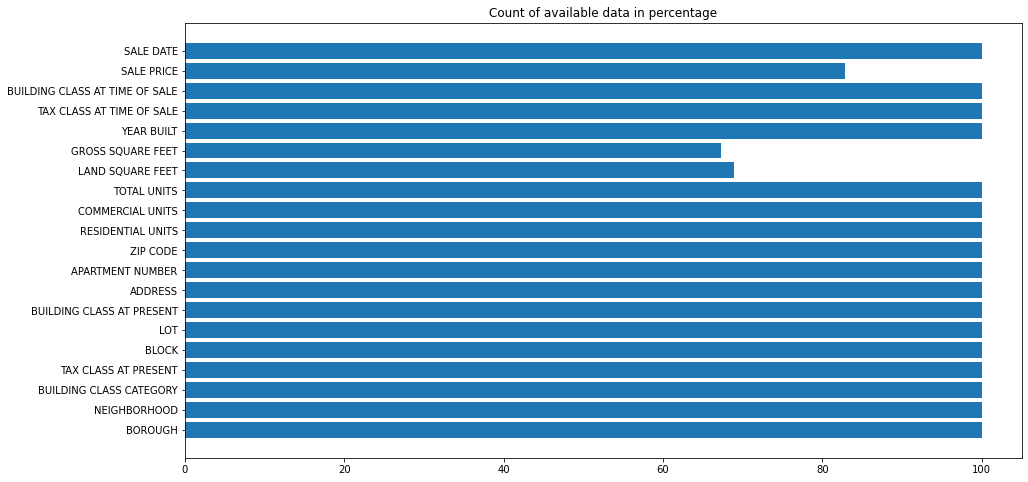

In [12]:
# Let's show where the missing values are and how many are they.
variables=df_sales.columns
count=[]
for variable in variables:
    length=df_sales[variable].count()
    count.append(length)

count_pct=np.round(100*pd.Series(count)/len(df_sales), 2)

plt.figure(figsize=(15, 8))
plt.barh(variables, count_pct)
plt.title('Count of available data in percentage')
plt.show()

<AxesSubplot:>

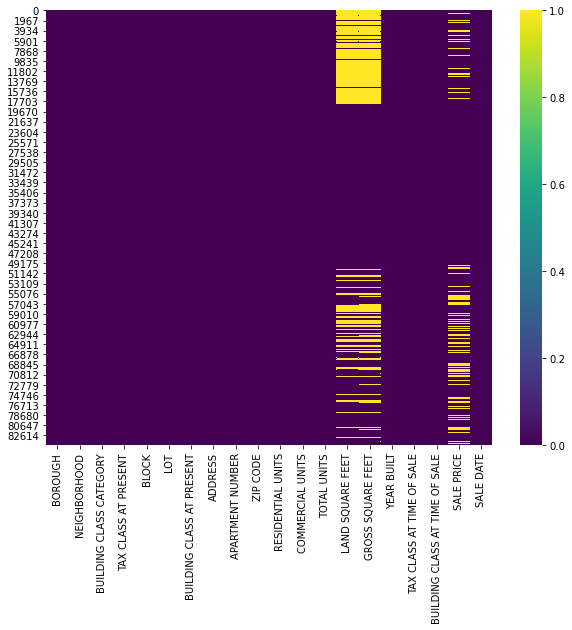

In [13]:
#We can also find which part of data are missing in these three columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_sales.isnull(), cmap='viridis')

Removing the missing values is not an option here because it covers 30% percent of out data. One option is to fill the missving values with their means. But before doing that, let's find and remove the outliers first, if there is any. 

In [14]:
df_sales[['LAND SQUARE FEET', 'GROSS SQUARE FEET']].describe()

,LAND SQUARE FEET,GROSS SQUARE FEET
count,5.829600e+04,5.693600e+04
mean,3.941676e+03,4.045707e+03
std,4.198397e+04,3.503249e+04
min,0.000000e+00,0.000000e+00
25%,1.650000e+03,1.046750e+03
50%,2.325000e+03,1.680000e+03
75%,3.500000e+03,2.560000e+03
max,4.252327e+06,3.750565e+06


There are outliers in the upper and lower bounds of the columns. So, to have a better data, we can set an upper bound of 75% for our dataset because 75th percentile of the dataset represents majority of the data.

In [15]:
# Correlations
df_sales[(df_sales['LAND SQUARE FEET']<=3500) & (df_sales['GROSS SQUARE FEET']<=2560)][['LAND SQUARE FEET', 'GROSS SQUARE FEET']].corr()

,LAND SQUARE FEET,GROSS SQUARE FEET
LAND SQUARE FEET,1.000000,0.796219
GROSS SQUARE FEET,0.796219,1.000000


The correlation between these two columns is positive, 0.79.

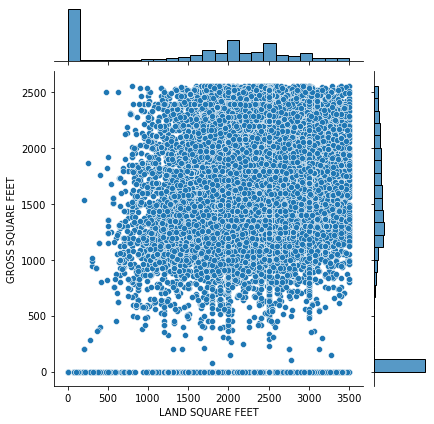

In [16]:
sns.jointplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', data=df_sales[(df_sales['LAND SQUARE FEET']<=3500) & (df_sales['GROSS SQUARE FEET']<=2560)], kind='scatter')

In [17]:
# Filling the missing values with their means
df_sales_LSFmean=df_sales['LAND SQUARE FEET'].astype('float').mean(axis=0)
df_sales_GSFmean=df_sales['GROSS SQUARE FEET'].astype('float').mean(axis=0)

df_sales['LAND SQUARE FEET'].replace(np.nan, df_sales_LSFmean, inplace=True)
df_sales['GROSS SQUARE FEET'].replace(np.nan, df_sales_GSFmean, inplace=True)

In [18]:
df_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [19]:
print('Before dropping missing values:', df_sales.shape)
df_sales=df_sales.dropna()
print('After dropping missing values: ', df_sales.shape)

Before dropping missing values: (84548, 20)
After dropping missing values:  (69987, 20)


In [20]:
# Checking for duplicates
print(sum(df_sales.duplicated()))

380


# Data Visualization

#### Sale Price

/Users/zabihbuda/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


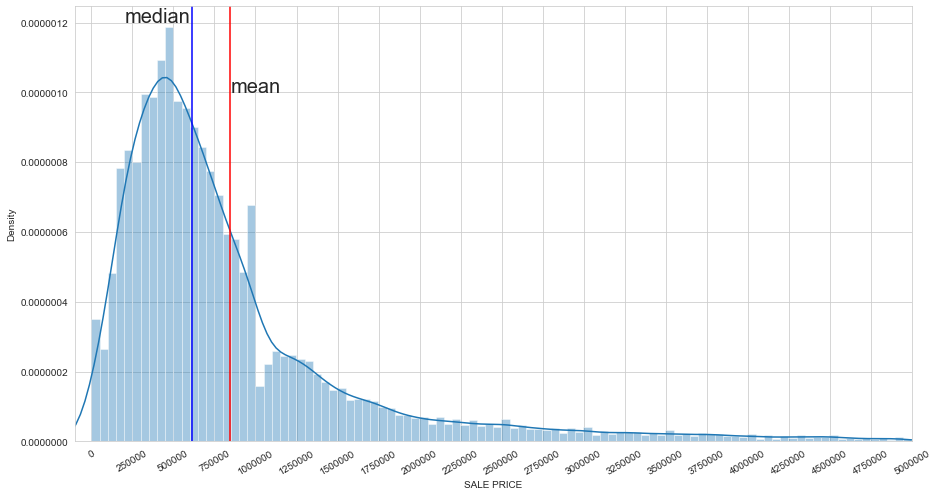

In [21]:
import matplotlib.ticker as ticker

sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plotd=sns.distplot(df_sales[(df_sales['SALE PRICE']>100) & (df_sales['SALE PRICE']<5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000])
plt.xticks(rotation=30)
plt.axvline(df_sales[(df_sales['SALE PRICE']>100) & (df_sales['SALE PRICE']<5000000)]['SALE PRICE'].mean(), c='red') #draws the mean line
plt.axvline(df_sales[(df_sales['SALE PRICE']>100) & (df_sales['SALE PRICE']<5000000)]['SALE PRICE'].median(), c='blue') #draws the median line
plt.text(200000, 0.0000012, 'median', fontsize=20)
plt.text(850000, 0.0000010, 'mean', fontsize=20)
plt.ticklabel_format(style='plain')
plt.show()


In [22]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
